In [80]:
# Proposed Project 
# Andrea Mazzocchi

# Import libraries
import os
import glob
import pandas as pd

import math
from IPython import display 
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

# Import data and combine

# Create new file containing mutations and cell line name by going through cell line files
os.chdir("/Users/test-august/GoogleDrive/TheDataIncubator/mutant_data")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ], sort=False) #combine all files in the list
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig') #export to csv

In [81]:
df = pd.read_csv("combined_csv.csv") # convert to dataframe
df = df[['GENE_NAME',' SAMPLE_NAME']] # reduce dataframe to only necessary files
df = df.rename(columns={" SAMPLE_NAME": "SAMPLE_NAME"})

In [82]:
df[['GENE_NAME','extras']] = df['GENE_NAME'].str.split('_',expand=True)

In [83]:
df = df[['SAMPLE_NAME','GENE_NAME']]
print(df)

       SAMPLE_NAME GENE_NAME
0            A2780       SRC
1            A2780       KDR
2            A2780       ATR
3            A2780      FLT4
4            A2780      EGFR
...            ...       ...
792090        5637     ERBB2
792091        5637     ERBB2
792092        5637     ERBB2
792093        5637     ERBB2
792094        5637     ERBB2

[792095 rows x 2 columns]


In [122]:
df1 = df.drop_duplicates()
print(df1)

       SAMPLE_NAME GENE_NAME
0            A2780       SRC
1            A2780       KDR
2            A2780       ATR
3            A2780      FLT4
4            A2780      EGFR
...            ...       ...
235952     NCI-H23      MC2R
235961     NCI-H23   PCDHA11
235962     NCI-H23     CXXC4
235964       HepG2    CTNNB1
235965        5637     ERBB2

[46264 rows x 2 columns]


In [123]:
df1_count = df1.groupby(['SAMPLE_NAME'],as_index=False).count()
df1_count = df1_count.rename(columns={"GENE_NAME": "NUM_GENES"}) 
print(df1_count)
print(df1_count.dtypes)

    SAMPLE_NAME  NUM_GENES
0          5637          1
1         A2780          8
2          A375          5
3          A549        559
4           AGS         36
..          ...        ...
138       U-937          3
139        U2OS          1
140       UMUC3          1
141    VMRC-LCD          2
142   WSU-DLCL2         26

[143 rows x 2 columns]
SAMPLE_NAME    object
NUM_GENES       int64
dtype: object


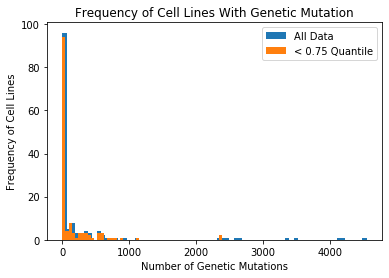

In [152]:
# Creating plots from cell line/mutation data
plt.figure(1)
plt.hist(df1_count['NUM_GENES'], bins = 'auto') # data before modification 
df1_count_mod = df1_count[df1_count.NUM_GENES < df1_count.NUM_GENES.quantile(.95)]
plt.hist(df1_count_mod['NUM_GENES'], bins = 'auto')
plt.title('Frequency of Cell Lines With Genetic Mutation')
plt.ylabel('Frequency of Cell Lines')
plt.xlabel('Number of Genetic Mutations')
plt.legend(['All Data', '< 0.95 Quantile'])

Text(0.5, 0, 'Number of Genetic Mutations')

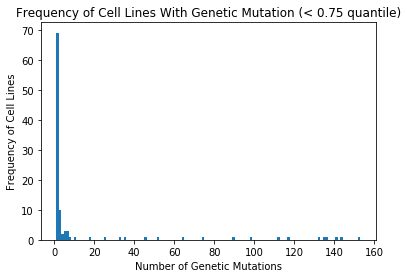

In [150]:
plt.figure(2)
plt.hist(df1_count_mod['NUM_GENES'], bins = 'auto')
plt.title('Frequency of Cell Lines With Genetic Mutation (< 0.75 quantile)')
plt.ylabel('Frequency of Cell Lines')
plt.xlabel('Number of Genetic Mutations')

      GENE_NAME  SAMPLE_NAME
0          A1BG            2
1          A1CF            1
2           A2M            6
3         A2ML1            6
4       A3GALT2            1
...         ...          ...
15171      ZXDC            3
15172    ZYG11A            2
15173    ZYG11B            3
15174       ZYX            2
15175     ZZEF1            9

[15176 rows x 2 columns]


Text(0.5, 0, 'Number of Genetic Mutations')

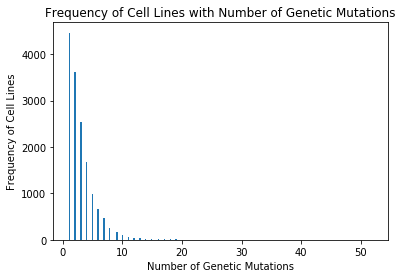

In [149]:
# Looking at most common genes
df1_genes = df1.groupby(['GENE_NAME'],as_index=False).count()
print(df1_genes)
plt.figure(3)
plt.hist(df1_genes['SAMPLE_NAME'], bins = 'auto')
plt.title('Frequency of Genetic Mutations in Cell Lines (all data)')
plt.ylabel('Frequency of Genetic Mutation')
plt.xlabel('Number of Cell Lines')

      GENE_NAME  SAMPLE_NAME
0          A1BG            2
1          A1CF            1
2           A2M            6
3         A2ML1            6
4       A3GALT2            1
...         ...          ...
15171      ZXDC            3
15172    ZYG11A            2
15173    ZYG11B            3
15174       ZYX            2
15175     ZZEF1            9

[15002 rows x 2 columns]


Text(0.5, 0, 'Number of Cell Lines')

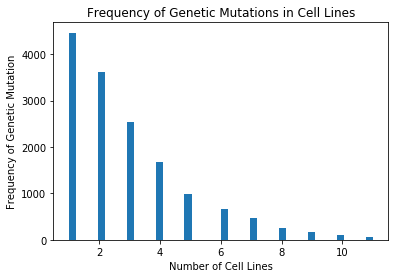

In [148]:
df1_genes.dtypes
df1_genes_mod = df1_genes[df1_genes.SAMPLE_NAME < df1_genes.SAMPLE_NAME.quantile(.99)]
print (df1_genes_mod)
plt.figure(4)
plt.hist(df1_genes_mod['SAMPLE_NAME'], bins = 'auto')
plt.title('Frequency of Genetic Mutations in Cell Lines (< 0.99 quantile)')
plt.ylabel('Frequency of Genetic Mutation')
plt.xlabel('Number of Cell Lines')

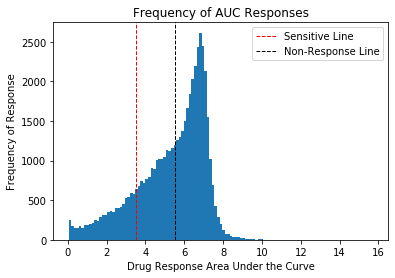

In [147]:
# Opening cell line drug response data & plotting 
cell_resp = pd.read_csv("/Users/test-august/GoogleDrive/TheDataIncubator/area_under_curve.csv")
plt.figure(5)
plt.hist(cell_resp['area_under_curve'], bins = 'auto')
plt.title('Frequency of AUC Responses')
plt.ylabel('Frequency of Response')
plt.xlabel('Drug Response Area Under the Curve')
plt.axvline(3.5, color='r', linestyle='dashed', linewidth=1)
plt.axvline(5.5, color='k', linestyle='dashed', linewidth=1)
plt.legend(['Sensitive Line', 'Non-Response Line'])